In [1]:
import pandas as pd
from statsmodels.formula.api import ols

#### DATA Exploration  

In [2]:
##Reading data 
data=pd.read_csv("D:/stats/HouseDetails.txt",sep="\t")

#### DATA Exploration 

In [3]:
data.shape

(1728, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB


In [5]:
data.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


In [6]:
data.head()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


<ipython-input-7-afd251033952>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'lotSize'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'landValue'}>,
        <AxesSubplot:title={'center':'livingArea'}>,
        <AxesSubplot:title={'center':'pctCollege'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'fireplaces'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'rooms'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

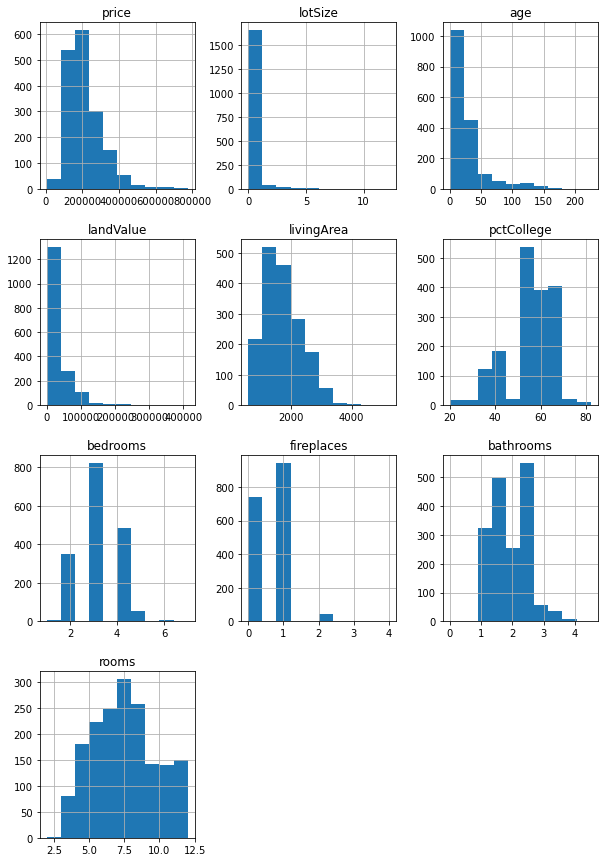

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
data.hist(ax = ax)

data is skewed 

Text(0, 0.5, 'rooms')

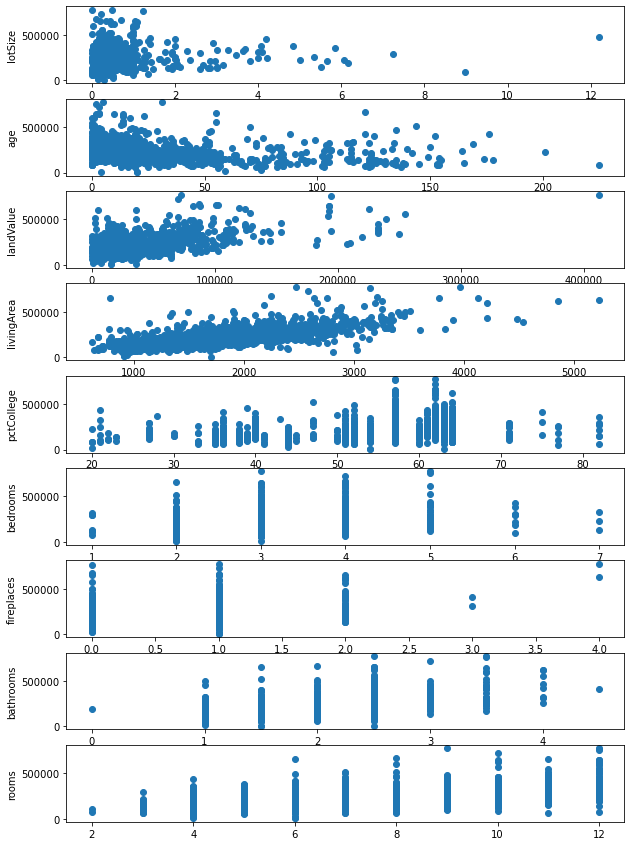

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(9, figsize=(10, 15))
ax[0].scatter(x = data['lotSize'], y = data['price'])
ax[0].set_ylabel("lotSize")

ax[1].scatter(x = data['age'], y = data['price'])
ax[1].set_ylabel("age")

ax[2].scatter(x = data['landValue'], y = data['price'])
ax[2].set_ylabel("landValue")

ax[3].scatter(x = data['livingArea'], y = data['price'])
ax[3].set_ylabel("livingArea")

ax[4].scatter(x = data['pctCollege'], y = data['price'])
ax[4].set_ylabel("pctCollege")

ax[5].scatter(x = data['bedrooms'], y = data['price'])
ax[5].set_ylabel("bedrooms")

ax[6].scatter(x = data['fireplaces'], y = data['price'])
ax[6].set_ylabel("fireplaces")

ax[7].scatter(x = data['bathrooms'], y = data['price'])
ax[7].set_ylabel("bathrooms")

ax[8].scatter(x = data['rooms'], y = data['price'])
ax[8].set_ylabel("rooms")

There are outliers in the data 

<AxesSubplot:>

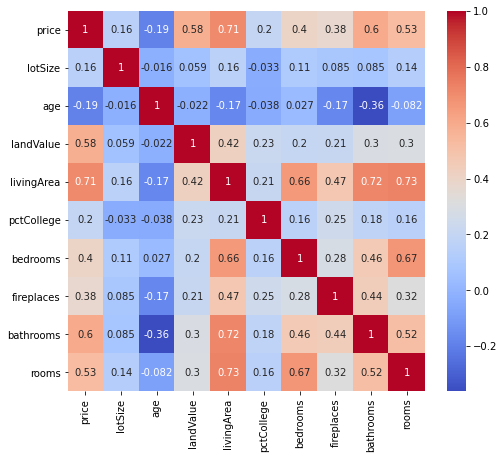

In [9]:
import seaborn as sns
import matplotlib.pyplot as pt
corr_matrix=data.corr()
plt.figure(figsize=(8,7))
sns.heatmap( corr_matrix,cmap="coolwarm",annot=True)

living Area and age are highly correlated to the target 

### Data cleaning 

##### checking null values 

In [10]:
null_columns=data.columns[data.isnull().any()]
df=data[null_columns].isnull().sum()
df

Series([], dtype: float64)

There is no null value in the data

##### checking skewness and outliers

In [11]:
###checking skewness
data.skew()

price         1.577713
lotSize       7.189350
age           2.497787
landValue     3.100671
livingArea    0.902790
pctCollege   -1.039067
bedrooms      0.396865
fireplaces    0.401087
bathrooms     0.317970
rooms         0.279245
dtype: float64

Text(0.5, 0, 'landValue')

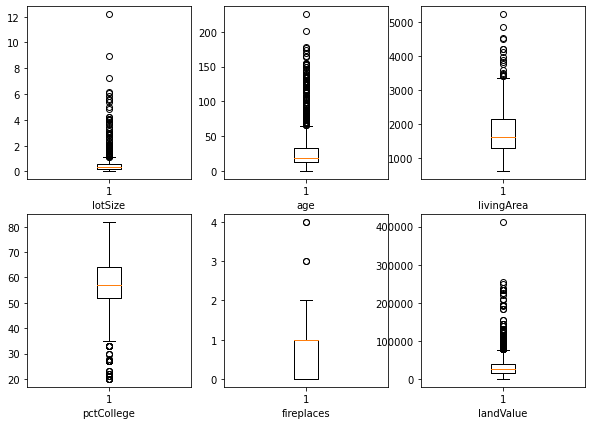

In [12]:
import seaborn as sns
fig, axs = plt.subplots(2, 3,figsize = (10,7))
axs[0,0].boxplot(data['lotSize'])
axs[0,0].set_xlabel('lotSize')

axs[0,1].boxplot(data['age'])
axs[0,1].set_xlabel('age')

axs[0,2].boxplot(data['livingArea'])
axs[0,2].set_xlabel('livingArea')

axs[1,0].boxplot(data['pctCollege'])
axs[1,0].set_xlabel('pctCollege')

axs[1,1].boxplot(data['fireplaces'])
axs[1,1].set_xlabel('fireplaces')

axs[1,2].boxplot(data['landValue'])
axs[1,2].set_xlabel('landValue')

In [13]:
data.skew()

price         1.577713
lotSize       7.189350
age           2.497787
landValue     3.100671
livingArea    0.902790
pctCollege   -1.039067
bedrooms      0.396865
fireplaces    0.401087
bathrooms     0.317970
rooms         0.279245
dtype: float64

In [14]:
for i in (['lotSize','age','landValue','livingArea','bedrooms','fireplaces','bathrooms','rooms']):  
    import numpy as np
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    data[i] = np.where(data[i] > q3 +1.5*iqr , data[i].median(), data[i])  ##can be used to impute median for outliers
    data[i] = np.where(data[i] < q1 -1.5*iqr , data[i].median(), data[i]) ##can be used to impute median for outliers

In [15]:
data.skew()

price         1.577713
lotSize       0.833494
age           0.712518
landValue     0.950322
livingArea    0.564468
pctCollege   -1.039067
bedrooms      0.164725
fireplaces    0.081318
bathrooms     0.292766
rooms         0.279245
dtype: float64

varibales are less skew now

Text(0.5, 0, 'landValue')

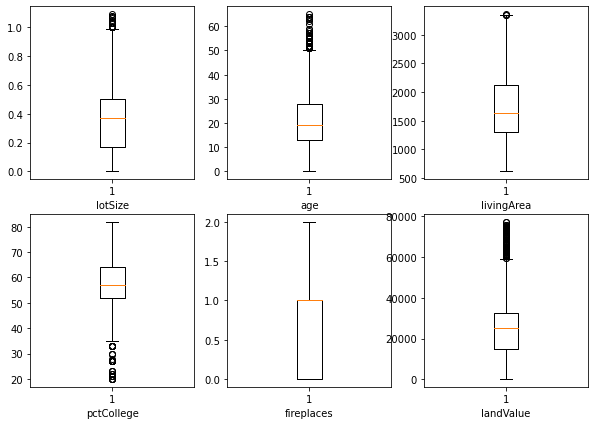

In [16]:
import seaborn as sns
fig, axs = plt.subplots(2, 3,figsize = (10,7))
axs[0,0].boxplot(data['lotSize'])
axs[0,0].set_xlabel('lotSize')

axs[0,1].boxplot(data['age'])
axs[0,1].set_xlabel('age')

axs[0,2].boxplot(data['livingArea'])
axs[0,2].set_xlabel('livingArea')

axs[1,0].boxplot(data['pctCollege'])
axs[1,0].set_xlabel('pctCollege')

axs[1,1].boxplot(data['fireplaces'])
axs[1,1].set_xlabel('fireplaces')

axs[1,2].boxplot(data['landValue'])
axs[1,2].set_xlabel('landValue')

outliers are decreased

Text(0, 0.5, 'rooms')

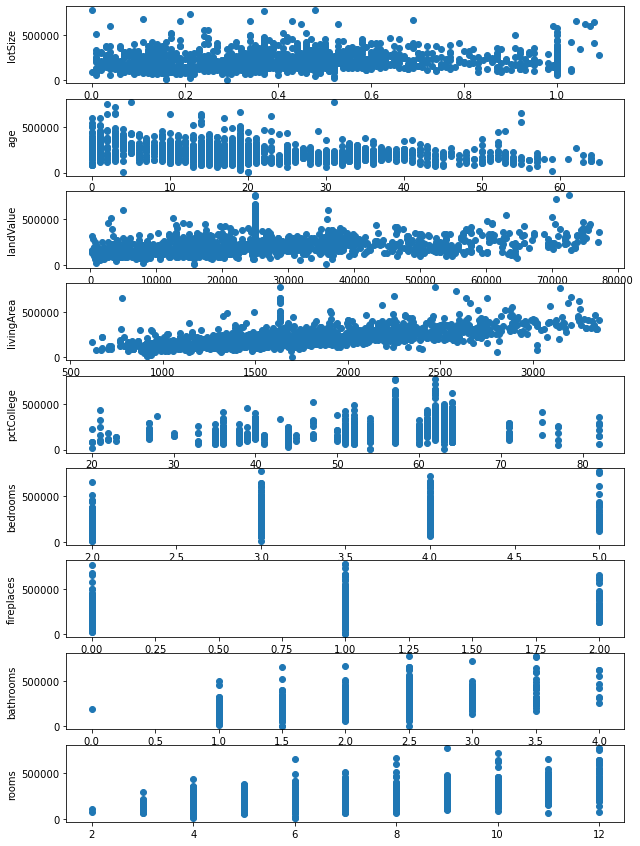

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(9, figsize=(10, 15))
ax[0].scatter(x = data['lotSize'], y = data['price'])
ax[0].set_ylabel("lotSize")

ax[1].scatter(x = data['age'], y = data['price'])
ax[1].set_ylabel("age")

ax[2].scatter(x = data['landValue'], y = data['price'])
ax[2].set_ylabel("landValue")

ax[3].scatter(x = data['livingArea'], y = data['price'])
ax[3].set_ylabel("livingArea")

ax[4].scatter(x = data['pctCollege'], y = data['price'])
ax[4].set_ylabel("pctCollege")

ax[5].scatter(x = data['bedrooms'], y = data['price'])
ax[5].set_ylabel("bedrooms")

ax[6].scatter(x = data['fireplaces'], y = data['price'])
ax[6].set_ylabel("fireplaces")

ax[7].scatter(x = data['bathrooms'], y = data['price'])
ax[7].set_ylabel("bathrooms")

ax[8].scatter(x = data['rooms'], y = data['price'])
ax[8].set_ylabel("rooms")

outliers decreased

##### Seperating target and predicting variables 

In [18]:
import numpy as np
predictor=data.iloc[:,data.columns !='price']
target=data.iloc[:,data.columns =='price']

Text(0.5, 0, '$price^{1/4}$')

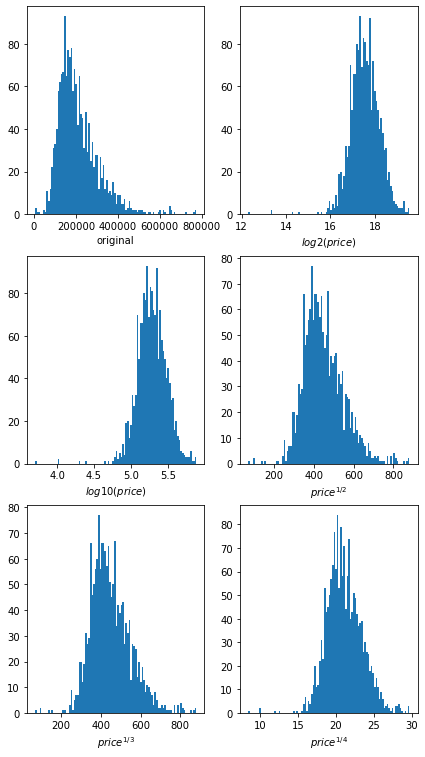

In [19]:
fig, axs = plt.subplots(3, 2,figsize = (7,13))
axs[0,0].hist(target['price'],bins=100)
axs[0,0].set_xlabel('original')

axs[0,1].hist(np.log2(target['price']),bins=100)
axs[0,1].set_xlabel('$log2(price)$')

axs[1,0].hist(np.log10(target['price']),bins=100)
axs[1,0].set_xlabel('$log10(price)$')

axs[1,1].hist(target['price'].pow(1./2),bins=100)
axs[1,1].set_xlabel('$price^{1/2}$')

axs[2,0].hist(target['price'].pow(1./2),bins=100)
axs[2,0].set_xlabel('$price^{1/3}$')

axs[2,1].hist(target['price'].pow(1./4),bins=100)
axs[2,1].set_xlabel('$price^{1/4}$')

skewness decreased after in (price)^1/3

In [20]:
target['price']=target['price'].pow(1./3)

<ipython-input-20-9cd5cc0b9b89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['price']=target['price'].pow(1./3)


##### categorical variables 

In [21]:
c_y ={"y":{"yes": 1, "no": 0}}
predictor.replace(c_y, inplace=True)

In [22]:
categorical_columns=[col for col in predictor.columns.values
                    if predictor[col].dtype =='object']
data_cat=predictor[categorical_columns]
data_num=predictor.drop(categorical_columns,axis=1)

In [23]:
data_cat_dummies=pd.get_dummies(data_cat,drop_first=True)
predictor =pd.concat([data_num,data_cat_dummies],axis=1)

##### Checking Correlation 

<AxesSubplot:>

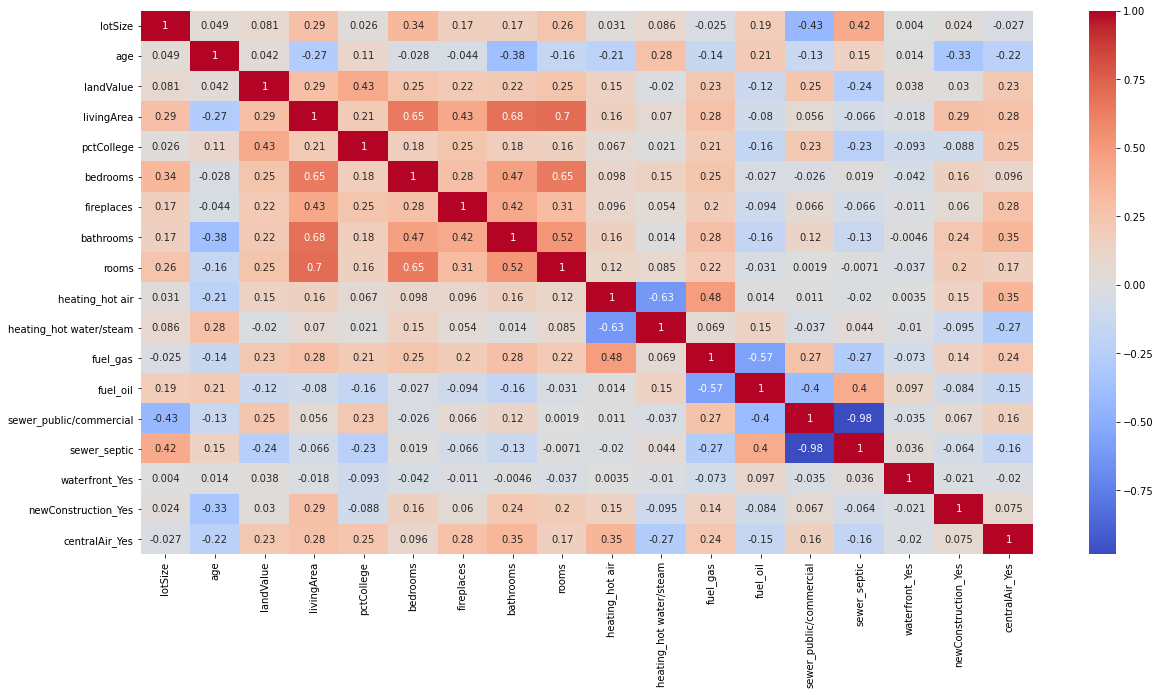

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=predictor.corr()
plt.figure(figsize=(20,10))
sns.heatmap( corr_matrix,cmap="coolwarm",annot=True)

Correlation is high among variable

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(predictor.values, i) for i in range(predictor.shape[1])]
vif["features"] = predictor.columns
vif

,VIF Factor,features
0,5.118343,lotSize
1,5.276350,age
2,4.696087,landValue
3,33.315137,livingArea
4,36.613911,pctCollege
5,38.683211,bedrooms
6,3.033378,fireplaces
7,21.243190,bathrooms
8,23.617206,rooms
9,49.876071,heating_hot air


Correlation is high among variable

##### scaling

In [26]:
predictor.describe()

,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating_hot air,heating_hot water/steam,fuel_gas,fuel_oil,sewer_public/commercial,sewer_septic,waterfront_Yes,newConstruction_Yes,centralAir_Yes
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.387361,20.277199,25673.912037,1731.720197,55.567708,3.141782,0.596065,1.898727,7.041667,0.648727,0.174769,0.692708,0.125000,0.701968,0.291088,0.008681,0.046875,0.367477
std,0.246784,13.126400,16585.382904,575.933418,10.333581,0.765598,0.538099,0.655376,2.316453,0.477506,0.379879,0.461505,0.330815,0.457526,0.454395,0.092791,0.211432,0.482257
min,0.000000,0.000000,200.000000,616.000000,20.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.370000,19.000000,25000.000000,1634.250000,57.000000,3.000000,1.000000,2.000000,7.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,28.000000,32700.000000,2115.250000,64.000000,4.000000,1.000000,2.500000,8.250000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.090000,65.000000,77200.000000,3358.000000,82.000000,5.000000,2.000000,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Few variables have high value and few have less values. Scaling is required 

In [27]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
predictor = norm.fit_transform(predictor)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 16)
predictor = pca.fit_transform(predictor)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(predictor, i) for i in range(predictor.shape[1])]
vif

[1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999998,
 1.0,
 0.9999999999999998,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 0.9999999999999998]

VIF should less be less than 10. Correlation decreased after applying pca 

#####  Train and test spilt

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictor,target, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)

(1382, 16)
(1382, 1)


#####  model builting and fitting

In [31]:
def model_pred(pred):
    global model
    import statsmodels.api as sm 
    pred= np.append(arr=np.ones((1382 ,1)).astype(int),values=pred,axis=1)
    model =sm.OLS(endog=y_train,exog=pred).fit()
    # Print the summary
    print(model.summary())
    

In [32]:
model_pred(X_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     118.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          5.61e-244
Time:                        10:11:57   Log-Likelihood:                -4344.5
No. Observations:                1382   AIC:                             8723.
Df Residuals:                    1365   BIC:                             8812.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2961      0.152    383.522      0.0

In [33]:
model_pred(X_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15]])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     126.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          5.22e-245
Time:                        10:11:57   Log-Likelihood:                -4344.6
No. Observations:                1382   AIC:                             8721.
Df Residuals:                    1366   BIC:                             8805.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2959      0.152    383.646      0.0

In [34]:
model_pred(X_train[:,[0,1,2,3,4,5,6,7,8,9,10,11,13,15]])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     135.3
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          5.05e-246
Time:                        10:11:57   Log-Likelihood:                -4344.7
No. Observations:                1382   AIC:                             8719.
Df Residuals:                    1367   BIC:                             8798.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2962      0.152    383.751      0.0

In [35]:
model_pred(X_train[:,[0,1,2,3,4,5,6,7,8,10,11,13,15]])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     145.6
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          6.16e-247
Time:                        10:11:57   Log-Likelihood:                -4345.1
No. Observations:                1382   AIC:                             8718.
Df Residuals:                    1368   BIC:                             8791.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2947      0.152    383.788      0.0

In [36]:
model_pred(X_train[:,[0,1,2,3,4,5,6,8,10,11,13,15]])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     157.7
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          8.00e-248
Time:                        10:11:57   Log-Likelihood:                -4345.6
No. Observations:                1382   AIC:                             8717.
Df Residuals:                    1369   BIC:                             8785.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2958      0.152    383.801      0.0

In [37]:
model_pred(X_train[:,[0,1,2,3,4,5,8,10,11,13,15]])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     171.8
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          1.22e-248
Time:                        10:11:57   Log-Likelihood:                -4346.4
No. Observations:                1382   AIC:                             8717.
Df Residuals:                    1370   BIC:                             8779.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2927      0.152    383.775      0.0

In [38]:
model_pred(X_train[:,[0,1,2,3,4,5,8,10,13,15]])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     188.4
Date:                Tue, 01 Jun 2021   Prob (F-statistic):          3.66e-249
Time:                        10:11:57   Log-Likelihood:                -4347.8
No. Observations:                1382   AIC:                             8718.
Df Residuals:                    1371   BIC:                             8775.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.2927      0.152    383.511      0.0

individual p and overall p is less than 0.05 So, OLS model is ready

##### checking Linear Regression Assumptions

In model summary seen in above cell, durbin_watson value is 1.985. That is between 1.5 and 2.5. So, no autocorrelation present in model

In [39]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(pd.DataFrame(X_train[:,[0,1,2,3,4,5,8,10,13,15]]).values, i) for i in range(pd.DataFrame(X_train[:,[0,1,2,3,4,5,8,10,13,15]]).shape[1])]
vif["features"] = pd.DataFrame(X_train[:,[0,1,2,3,4,5,8,10,13,15]]).columns
vif

,VIF Factor,features
0,1.001764,0
1,1.001302,1
2,1.002998,2
3,1.001063,3
4,1.002917,4
5,1.002332,5
6,1.002861,6
7,1.003242,7
8,1.002438,8
9,1.001792,9


As VIF is than less 10, there is no correlation present in predictor variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


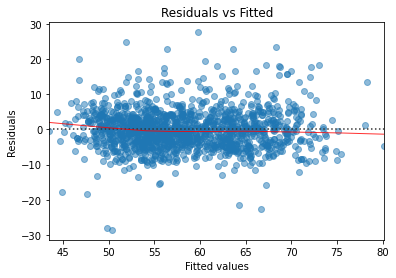

In [40]:
###Residuals vs Fitted
def ResidualsvsFitted(predictor):

    # model values
    global model_fitted_y
    model_fitted_y = model.fittedvalues
    # model residuals
    global model_residuals
    model_residuals = model.resid
    # normalized residuals
    global model_norm_residuals
    model_norm_residuals = model.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    global model_norm_residuals_abs_sqrt
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    global model_abs_resid
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    global model_leverage
    model_leverage = model.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    global model_cooks 
    model_cooks = model.get_influence().cooks_distance[0]

    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y_train['price'],
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals');
ResidualsvsFitted(X_train[:,[0,1,2,3,4,5,8,10,13,15]])

Points are random distributed along horizontal line. So, target and predictor variables have linearity

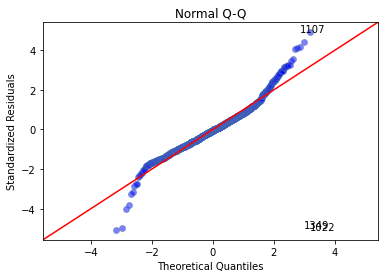

In [41]:
##normal q-q plot
def qq():
    from scipy import stats
    import statsmodels.api as sm
    QQ = sm.ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    global abs_norm_resid_top_3
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));    
qq()

Few points are not on line but majority of points on line.  

Text(0.5, 0, 'Residuals histogram')

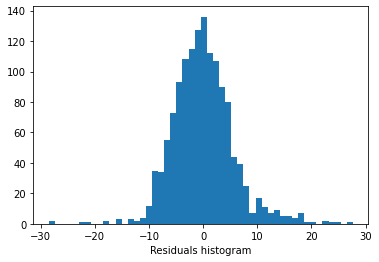

In [42]:
res_hist = plt.figure()
res_hist.axes[0] = plt.hist(model_residuals,bins=50)
res_hist.axes[0].set_xlabel('Residuals histogram')

Histogram is showing normality in residuals 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


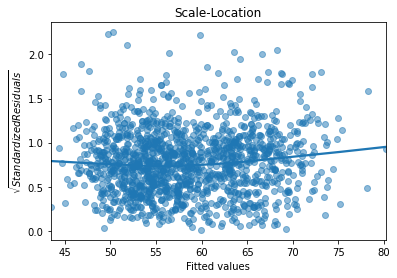

In [43]:
def heteroscedasticity():
    ##heteroscedasticity. 
    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
               scatter=False,
               ci=False,
               lowess=True);
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{Standardized Residuals}$');

heteroscedasticity()

In [44]:
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(model.resid, model.model.exog)
test

(23.795622158786976,
 0.00816174836053708,
 2.4019800342236173,
 0.007922221195901595)

Since p value is greater than 0.05. Hence, variables have normal distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


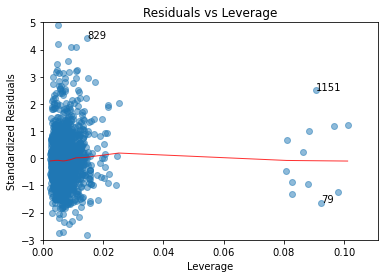

In [45]:
def ResidualsvsLeverage():##Residuals vs Leverage
    plot_lm_4 = plt.figure();
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
    sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
         plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));
            
ResidualsvsLeverage()

Outlier does not have much impact on the model as we there are no points near upper right and lower right corner.

In [46]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence
# Compute the influence to get Cook's distance
inf = influence(model)

C, P = inf.cooks_distance

print(max(C))

0.05745638584170107


 Max value of Cook's distance is 0.06 that is less than 1. Hence, there is no influential Observations

##### Testing model

In [47]:
import statsmodels.api as sm 
pred_test= np.append(arr=np.ones((346 ,1)).astype(int),values=X_test[:,[0,1,2,3,4,5,6,7,10,11,12,13,14,15]],axis=1)
model =sm.OLS(endog=y_test,exog=pred_test).fit()
y_pred = model.fittedvalues

In [48]:
##changing target back to original form 
y_test=y_test.pow(3)
y_pred=y_pred.pow(3)

In [49]:
diff=y_test['price']-y_pred
RMSE=(diff.sum()**1/2)/346
print(RMSE)

3042.665565124305
